# Importing libraries and setup

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# creating path variable
path = r'/Users/paigepearson/Desktop/Data Analytics/Immersion Course/Achievement 4/Instacart Basket Analysis'

In [ ]:
# importing final data from 4.9
df_instacart = pd.read_pickle(os.path.join(path, 'Data', 'Prepared Data', 'instacart_merged.pkl'))

In [4]:
# removing PII data as before
df_insta = df_instacart.drop(columns = ['first_name', 'last_name', '_merge'])

In [5]:
# creating age_flag
df_insta.loc[df_insta['age'] >= 65, 'age_flag'] = 'Senior'
df_insta.loc[(df_insta['age'] < 65) & (df_insta['age'] >= 40), 'age_flag'] = 'Middle Aged'
df_insta.loc[(df_insta['age'] < 40) & (df_insta['age'] >= 26), 'age_flag'] = 'Adult'
df_insta.loc[(df_insta['age'] < 26) & (df_insta['age'] >= 18), 'age_flag'] = 'Young Adult'

In [6]:
# creating income flag
df_insta.loc[df_insta['income'] >= 150000, 'income_flag'] = 'High Income'
df_insta.loc[(df_insta['income'] < 150000) & (df_insta['income'] >= 50000), 'income_flag'] = 'Middle Income'
df_insta.loc[df_insta['income'] < 50000, 'income_flag'] = 'Low Lncome'

In [7]:
# creating kid flag
df_insta.loc[df_insta['number_of_dependants'] == 0, 'kid_flag'] = 'Childless'
df_insta.loc[df_insta['number_of_dependants'] != 0, 'kid_flag'] = 'Has Child'

In [8]:
# creating time flag for order-periods of the day, based on chart 'Total Orders by Hour'
df_insta.loc[(df_insta['order_hour_of_day'] >= 0) & (df_insta['order_hour_of_day'] < 6), 'time_flag'] = 'Morning Lull'
df_insta.loc[(df_insta['order_hour_of_day'] >= 6) & (df_insta['order_hour_of_day'] < 9), 'time_flag'] = 'Morning Rise'
df_insta.loc[(df_insta['order_hour_of_day'] >= 9) & (df_insta['order_hour_of_day'] < 17), 'time_flag'] = 'Peak'
df_insta.loc[(df_insta['order_hour_of_day'] >= 18) & (df_insta['order_hour_of_day'] <= 23), 'time_flag'] = 'Evening Fall'

## Step 7 - Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

In [9]:
# aggregating statistics for age profile
age_statistics = df_insta.groupby(['age_flag']).agg({'days_since_last_order':['min', 'max', 'mean'], 'prices':['sum', 'min', 'max', 'mean']})

In [10]:
age_statistics

days_since_last_order                       prices             \
                              min   max       mean         sum  min   max   
age_flag                                                                    
Adult                         0.0  30.0  11.116574  55418753.9  1.0  25.0   
Middle Aged                   0.0  30.0  11.117805  98672180.4  1.0  25.0   
Senior                        0.0  30.0  11.078641  66845644.8  1.0  25.0   
Young Adult                   0.0  30.0  11.093030  31489541.5  1.0  25.0   

                       
                 mean  
age_flag               
Adult        7.785789  
Middle Aged  7.791837  
Senior       7.796546  
Young Adult  7.785748

## Step 8 & 9 - Compare customer profiles with regions and departments. Identify any link between them and see if customers demonstrate different behaviors across regions. Create charts and export them.

In [11]:
# import dataframe with departments
df_dep = pd.read_csv(os.path.join(path, 'Data', 'Prepared Data', 'departments_wrangled.csv'))

In [12]:
df_dep.head()

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [13]:
# renaming column
df_dep.rename(columns = {'Unnamed: 0': 'department_id'}, inplace = True)

In [14]:
# checking work
df_dep.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [15]:
# merging both dataframes
df_merged = df_insta.merge(df_dep, on = 'department_id')

In [16]:
# allowing all columns to be seen
pd.set_option('display.max_columns', None)

In [17]:
df_merged.head()

,user_id,gender,state,age,date_joined,number_of_dependants,marital_status,income,order_id,eval_set,order_number,order_day_of_week,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_spent,spending_flag,median_orders,order_frequency_flag,age_flag,income_flag,kid_flag,time_flag,department
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,2543867,prior,5,1,9,30.0,196,2,0,Soda,77,7,9.0,Mid-range,Regularly busy,Busiest days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,Middle Aged,High Income,Has Child,Peak,beverages
1,26711,Female,Missouri,48,1/1/2017,3,married,165665,1285508,prior,7,5,15,11.0,196,1,1,Soda,77,7,9.0,Mid-range,Regularly busy,Regular days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,Middle Aged,High Income,Has Child,Peak,beverages
2,26711,Female,Missouri,48,1/1/2017,3,married,165665,2578584,prior,8,1,15,10.0,196,2,1,Soda,77,7,9.0,Mid-range,Regularly busy,Busiest days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,Middle Aged,High Income,Has Child,Peak,beverages
3,33890,Female,New Mexico,36,1/1/2017,0,single,59285,1044841,prior,3,6,11,30.0,196,1,0,Soda,77,7,9.0,Mid-range,Regularly busy,Regular days,Most orders,12,Regular customer,7.057534,Low spender,26.0,Non-frequent customer,Adult,Middle Income,Childless,Peak,beverages
4,33890,Female,New Mexico,36,1/1/2017,0,single,59285,474720,prior,4,1,20,16.0,196,6,1,Soda,77,7,9.0,Mid-range,Regularly busy,Busiest days,Average orders,12,Regular customer,7.057534,Low spender,26.0,Non-frequent customer,Adult,Middle Income,Childless,Evening Fall,beverages


In [18]:
# creating crosstab of departments and age
crosstab_dep_age = pd.crosstab(df_merged['department'], df_merged['age_flag'], dropna = False)

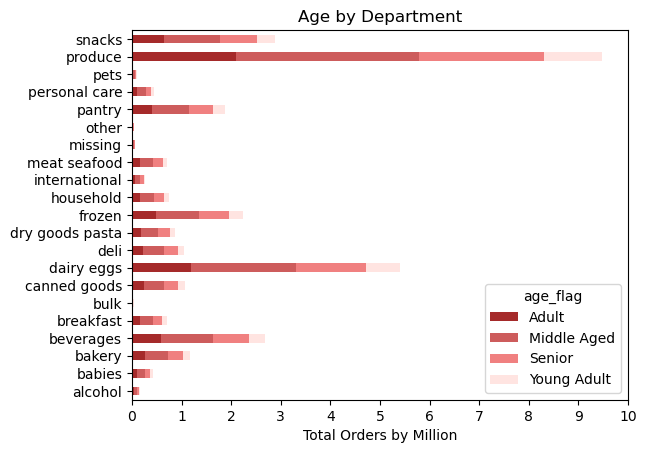

In [23]:
# creating stacked bar chart for crosstab
bar_dep_age = crosstab_dep_age.plot.barh(stacked = True, color = ['brown', 'indianred', 'lightcoral', 'mistyrose'])
plt.title('Age by Department')
plt.xticks([0, 1000000, 2000000, 3000000, 4000000, 5000000, 6000000, 7000000, 8000000, 9000000, 10000000], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
plt.xlabel('Total Orders by Million')
plt.ylabel('')
plt.show()

In [24]:
# creating crosstab of departments and income
crosstab_dep_inc = pd.crosstab(df_merged['department'], df_merged['income_flag'], dropna = False)

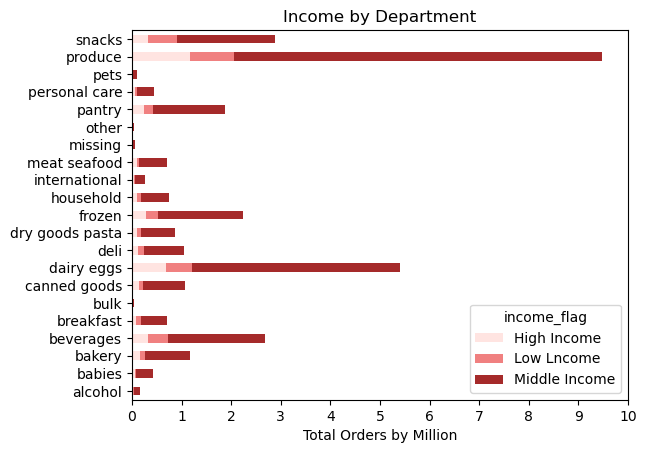

In [28]:
# creating stacked bar chart for crosstab
bar_dep_inc = crosstab_dep_inc.plot.barh(stacked = True, color = ['mistyrose', 'lightcoral', 'brown'])
plt.title('Income by Department')
plt.ylabel('')
plt.xlabel('Total Orders by Million')
plt.xticks([0, 1000000, 2000000, 3000000, 4000000, 5000000, 6000000, 7000000, 8000000, 9000000, 10000000], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
plt.show()

In [29]:
# creating crosstab of departments and dependants
crosstab_dep_kid = pd.crosstab(df_merged['department'], df_merged['kid_flag'], dropna = False)

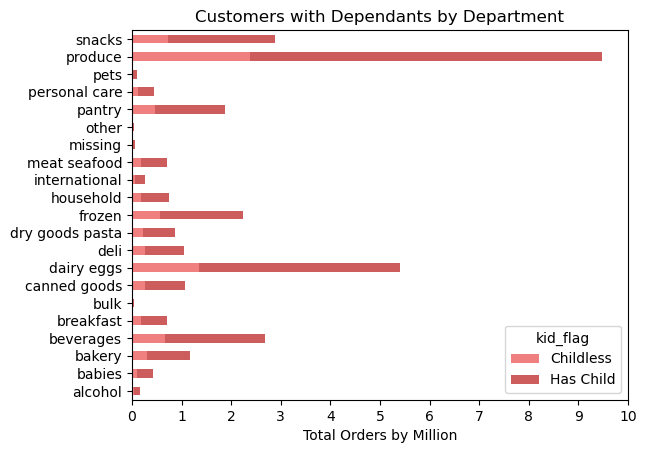

In [30]:
# creating stacked bar chart for crosstab
bar_dep_kid = crosstab_dep_kid.plot.barh(stacked = True, color = ['lightcoral', 'indianred'])
plt.title('Customers with Dependants by Department')
plt.ylabel('')
plt.xlabel('Total Orders by Million')
plt.xticks([0, 1000000, 2000000, 3000000, 4000000, 5000000, 6000000, 7000000, 8000000, 9000000, 10000000], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
plt.show()

Note: recreating regional divisions from Part 1 to examine customer profiles with regions

In [31]:
# recording state counts to check region counts against later
df_merged['state'].value_counts(dropna = False)

Pennsylvania            667082
California              659783
Rhode Island            656913
Georgia                 656389
New Mexico              654494
Arizona                 653964
North Carolina          651900
Oklahoma                651739
Alaska                  648495
Minnesota               647825
Massachusetts           646358
Wyoming                 644255
Virginia                641421
Missouri                640732
Texas                   640394
Colorado                639280
Maine                   638583
North Dakota            638491
Alabama                 638003
Kansas                  637538
Louisiana               637482
Delaware                637024
South Carolina          636754
Oregon                  636425
Arkansas                636144
Nevada                  636139
New York                635983
Montana                 635265
South Dakota            633772
Illinois                633024
Hawaii                  632901
Washington              632852
Mississi

In [32]:
# creating an empty regions variable
regions = []

In [33]:
# creating region categories with a for loop
for value in df_insta['state']:
    if value in ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']:
        regions.append('Northeast')
    elif value in ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']:
        regions.append('Midwest')
    elif value in ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']:
        regions.append('South')
    else:
        regions.append('West')

In [34]:
# creating region column and imputing regions variable
df_merged['region'] = regions

In [35]:
# checking work
df_merged.head()

,user_id,gender,state,age,date_joined,number_of_dependants,marital_status,income,order_id,eval_set,order_number,order_day_of_week,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_spent,spending_flag,median_orders,order_frequency_flag,age_flag,income_flag,kid_flag,time_flag,department,region
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,2543867,prior,5,1,9,30.0,196,2,0,Soda,77,7,9.0,Mid-range,Regularly busy,Busiest days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,Middle Aged,High Income,Has Child,Peak,beverages,Midwest
1,26711,Female,Missouri,48,1/1/2017,3,married,165665,1285508,prior,7,5,15,11.0,196,1,1,Soda,77,7,9.0,Mid-range,Regularly busy,Regular days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,Middle Aged,High Income,Has Child,Peak,beverages,Midwest
2,26711,Female,Missouri,48,1/1/2017,3,married,165665,2578584,prior,8,1,15,10.0,196,2,1,Soda,77,7,9.0,Mid-range,Regularly busy,Busiest days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,Middle Aged,High Income,Has Child,Peak,beverages,Midwest
3,33890,Female,New Mexico,36,1/1/2017,0,single,59285,1044841,prior,3,6,11,30.0,196,1,0,Soda,77,7,9.0,Mid-range,Regularly busy,Regular days,Most orders,12,Regular customer,7.057534,Low spender,26.0,Non-frequent customer,Adult,Middle Income,Childless,Peak,beverages,Midwest
4,33890,Female,New Mexico,36,1/1/2017,0,single,59285,474720,prior,4,1,20,16.0,196,6,1,Soda,77,7,9.0,Mid-range,Regularly busy,Busiest days,Average orders,12,Regular customer,7.057534,Low spender,26.0,Non-frequent customer,Adult,Middle Income,Childless,Evening Fall,beverages,Midwest


In [36]:
df_merged['region'].value_counts(dropna = False)

South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: region, dtype: int64

In [37]:
# creating crosstab of age and region
crosstab_age_region = pd.crosstab(df_merged['age_flag'], df_merged['region'], dropna = False)

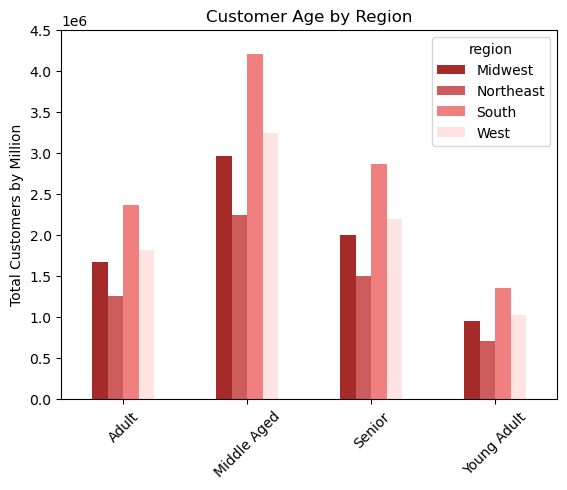

In [38]:
# creating bar chart of crosstab
bar_age_region = crosstab_age_region.plot.bar(color = ['brown', 'indianred', 'lightcoral', 'mistyrose'])
plt.title('Customer Age by Region')
plt.ylabel('Total Customers by Million')
plt.xlabel('')
plt.xticks(rotation = 45)
plt.yticks([0, 500000, 1000000, 1500000, 2000000, 2500000, 3000000, 3500000, 4000000, 4500000])
plt.show()

In [39]:
# creating crosstab of income and region
crosstab_inc_region = pd.crosstab(df_merged['income_flag'], df_merged['region'], dropna = False)

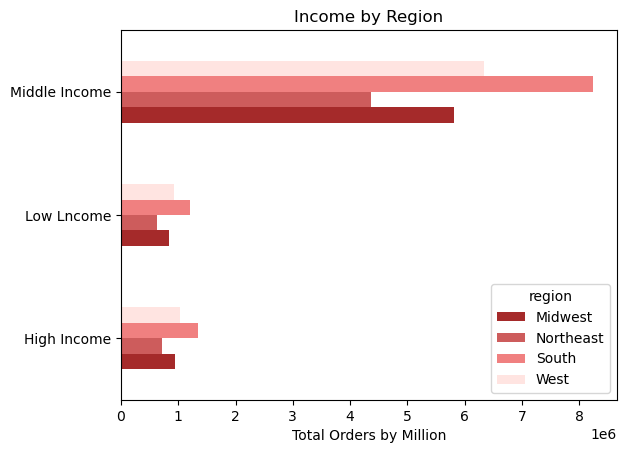

In [41]:
# creating bar chart of crosstab
bar_inc_region = crosstab_inc_region.plot.barh(color = ['brown', 'indianred', 'lightcoral', 'mistyrose'])
plt.title('Income by Region')
plt.ylabel('')
plt.xlabel('Total Orders by Million')
plt.show()

In [42]:
# creating crosstab of dependants and region
crosstab_kid_region = pd.crosstab(df_merged['region'], df_merged['kid_flag'], dropna = False)

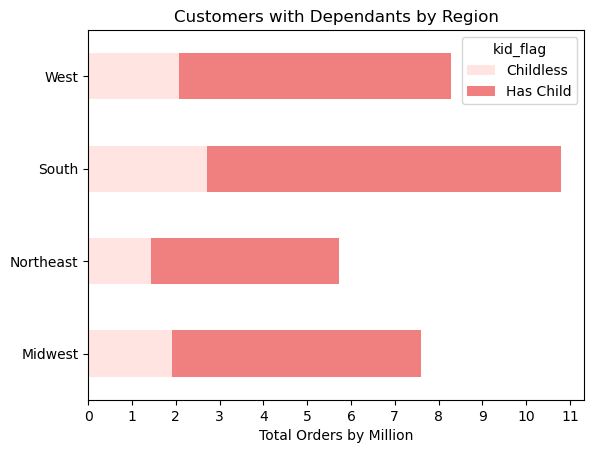

In [50]:
# creating stacked bar chart for crosstab
bar_kid_region = crosstab_kid_region.plot.barh(stacked = True, color = ['mistyrose', 'lightcoral'])
plt.title('Customers with Dependants by Region')
plt.ylabel('')
plt.xlabel('Total Orders by Million')
plt.xticks([0, 1000000, 2000000, 3000000, 4000000, 5000000, 6000000, 7000000, 8000000, 9000000, 10000000, 11000000], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])
plt.show()

In [53]:
# exporting charts
bar_dep_age.figure.savefig(os.path.join(path,'Analysis','Visualizations','bar_dep_age.png'))
bar_dep_inc.figure.savefig(os.path.join(path,'Analysis','Visualizations','bar_dep_inc.png'))
bar_dep_kid.figure.savefig(os.path.join(path,'Analysis','Visualizations','bar_dep_kid.png'))
bar_age_region.figure.savefig(os.path.join(path,'Analysis','Visualizations','bar_age_region.png'))
bar_inc_region.figure.savefig(os.path.join(path,'Analysis','Visualizations','bar_inc_region.png'))
bar_kid_region.figure.savefig(os.path.join(path,'Analysis','Visualizations','bar_kid_region.png'))